## 讀取檔案

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("mart.csv", encoding="utf-8")
df

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期
0,16740494,全聯實業股份有限公司,16741228,台北北投分公司,臺北市北投路２段１１號地下１樓,1,0870908,0900409
1,16740494,全聯實業股份有限公司,16741233,台北忠孝分公司,臺北市大安區忠孝東路４段５５９巷１６弄２１號１樓、地下１樓,3,0870908,0950221
2,16740494,全聯實業股份有限公司,16741249,台北縣土城分公司,新北市土城區立仁街４０２號１樓、地下１樓,3,0870908,0910618
3,16740494,全聯實業股份有限公司,16741254,彰化鹿港分公司,彰化縣鹿港鎮復興路210號,1,0870908,0970220
4,16740494,全聯實業股份有限公司,16741260,花蓮國聯分公司,花蓮縣花蓮市國聯二路110號,1,0870908,1070615
...,...,...,...,...,...,...,...,...
20251,23285582,萊爾富國際股份有限公司,97477450,彰化國聖分公司,彰化縣彰化市中山路三段七０六號一樓,1,0860703,0860703
20252,23285582,萊爾富國際股份有限公司,97478444,新竹經國分公司,新竹市經國路二段三五二號一樓,3,0860705,0860705
20253,23285582,萊爾富國際股份有限公司,97478866,北巿擎天分公司,臺北市中山區民權西路四二之一號一樓,3,0860708,0860708
20254,23285582,萊爾富國際股份有限公司,97479366,永康中正南分公司,臺南市永康區中正南路八六七、八六九號一樓,3,0860708,0860708


## 萊爾富

In [2]:
def hilife(compilation):
    if compilation == 23285582:
        return True
    else:
        return False
hilife = df["公司統一編號"].apply(hilife)
hilife_df = df[hilife]

listed=[]
for i in hilife_df["分公司地址"]:
    city = list(i)[0:3]
    city="".join(city)
    #print(city)
    listed.append(city)
    
#print(listed)
#cities = "".join(listed)
#print(cities, end="\n")

hilife_df.insert(loc=8, column="city", value=listed)
hilife_df

def intaipei(city):
    if "臺北市" in city:
        return True
    else:
        return False


taipei = hilife_df["分公司地址"].apply(intaipei)
hilife_df_taipei = hilife_df[taipei]


listed_time = []
for i in hilife_df_taipei["分公司核准設立日期"]:
    c = list(i)[0:3]
    listed_time.append((i)[0:3])
listed_time
hilife_df_taipei.insert(loc=9, column="time", value=listed_time)
hilife_df_taipei

# listed=[]
# for i in hilife_df_taipei["分公司地址"]:
#     area = list(i)[3:6]
#     area="".join(area)
#     listed.append(area)
# hilife_df_taipei.insert(loc=11, column="area", value=listed)
# hilife_df_taipei

count_list = []
for i in hilife_df_taipei["time"]:
    count_list.append(i)
from collections import Counter
temp = Counter(count_list)
c = temp.most_common()
c.sort()
c = dict(c)
pd_list=[]
for i in hilife_df_taipei["time"]:
    pd_list.append(c[i])
pd_list
hilife_df_taipei.insert(loc=10, column="count", value=pd_list)
hilife_df_taipei

hilife_df = hilife_df_taipei.sort_values(by="分公司核准設立日期")
hilife_df

listed=[]
for i in hilife_df["分公司地址"]:
#     print(i)
    area = list(i)[3:6]
    area="".join(area)
    listed.append(area)

hilife_df.insert(loc=11, column="area", value=listed)
hilife_df

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time,count,area
17841,23285582,萊爾富國際股份有限公司,23428815,延吉分公司,臺北市松山區延吉街２７號１樓,3,0780626,0801122,臺北市,078,12,松山區
17840,23285582,萊爾富國際股份有限公司,23428809,安東分公司,臺北市大安區安東街５０號之３、之４一樓,3,0780626,0830421,臺北市,078,12,大安區
17842,23285582,萊爾富國際股份有限公司,23428836,南港分公司,臺北市南港區南港路三段８號１樓,3,0780627,0910104,臺北市,078,12,南港區
17839,23285582,萊爾富國際股份有限公司,23427962,民族分公司,臺北市大同區民族西路２３１號１樓,3,0780718,0860114,臺北市,078,12,大同區
17838,23285582,萊爾富國際股份有限公司,23427864,木新分公司,臺北市文山區木新路二段２１２號１樓,3,0780718,0890518,臺北市,078,12,文山區
...,...,...,...,...,...,...,...,...,...,...,...,...
19959,23285582,萊爾富國際股份有限公司,90217732,第四九五八分公司,臺北市文山區景興路10巷2號1樓,1,1101214,,臺北市,110,15,文山區
20005,23285582,萊爾富國際股份有限公司,90646889,第四八九三分公司,臺北市內湖區內湖路一段285巷65弄17、19號1樓,1,1101214,,臺北市,110,15,內湖區
19992,23285582,萊爾富國際股份有限公司,90604380,第四九三四分公司,臺北市信義區福德街268巷18號1樓及268巷4弄1號1樓,1,1110211,,臺北市,111,3,信義區
19995,23285582,萊爾富國際股份有限公司,90604760,第四九八七分公司,臺北市大安區延吉街160巷11號1樓,1,1110217,,臺北市,111,3,大安區


In [3]:
# hilife_df = hilife_df.sort_values(by="分公司核准設立日期")
# hilife_df



hilife_group_df = hilife_df.groupby("area")
hilife_group_df.agg("count")
# def Songshan(city):
#     if "松山區" in city:
#         return True
#     else:
#         return False


# songshan = hilife_df["area"].apply(Songshan)
# hilife_df = hilife_df[songshan]
# hilife_df

# hilife_df = hilife_df.sort_values(by="分公司核准設立日期")

# hilife_df.to_csv('hilife_df.csv', index=False)

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time,count
area,,,,,,,,,,,
中山區,64,64,64,64,64,64,64,64,64,64,64
中正區,34,34,34,34,34,34,34,34,34,34,34
信義區,27,27,27,27,27,27,27,27,27,27,27
內湖區,57,57,57,57,57,57,57,57,57,57,57
北投區,29,29,29,29,29,29,29,29,29,29,29
南大路,1,1,1,1,1,1,1,1,1,1,1
南港區,22,22,22,22,22,22,22,22,22,22,22
士林區,36,36,36,36,36,36,36,36,36,36,36
大同區,33,33,33,33,33,33,33,33,33,33,33


## 萊爾富 折線圖

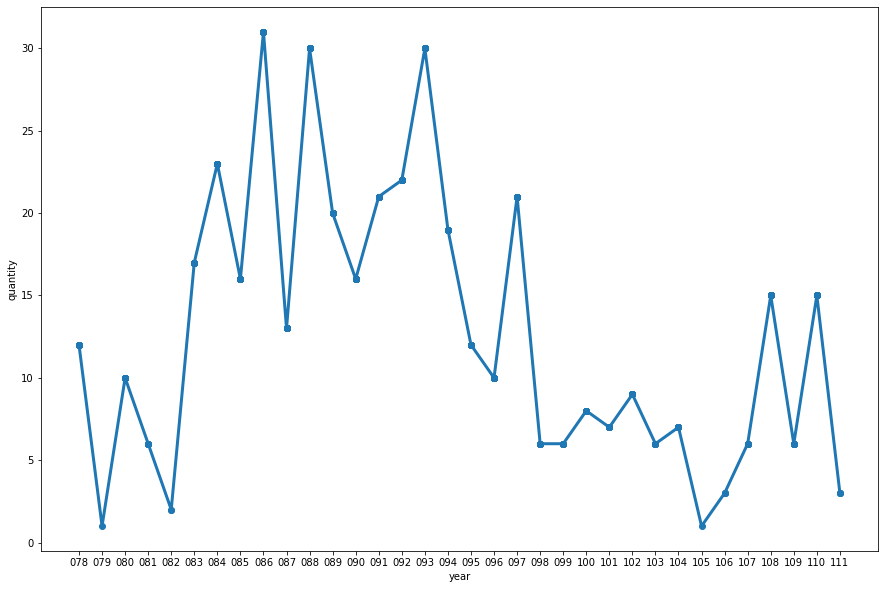

In [4]:
from matplotlib import rcParams
rcParams["figure.figsize"] = 15, 10 #調整大小
hilife_y=list(hilife_df["count"])
hilife_x=list(hilife_df["time"])
plt.plot(hilife_x, hilife_y, marker='o', linewidth=3)
plt.xlabel("year")
plt.ylabel("quantity")
plt.ylim = (0,90)
plt.show()

## okmart

In [5]:
def okmart(compilation):
    if compilation == 22853565:
        return True
    else:
        return False
okmart = df["公司統一編號"].apply(okmart)
okmart_df = df[okmart]

listed=[]
for i in okmart_df["分公司地址"]:
    city = list(i)[0:3]
    city="".join(city)
    #print(city)
    listed.append(city)
    
#print(listed)
#cities = "".join(listed)
#print(cities, end="\n")

okmart_df.insert(loc=8, column="city", value=listed)


def intaipei(city):
    if "臺北市" in city:
        return True
    else:
        return False


taipei = okmart_df["分公司地址"].apply(intaipei)
okmart_df_taipei = okmart_df[taipei]

listed_time = []
for i in okmart_df_taipei["分公司核准設立日期"]:
    c = list(i)[0:3]
    listed_time.append((i)[0:3])
listed_time
okmart_df_taipei.insert(loc=9, column="time", value=listed_time)
okmart_df_taipei

count_list = []
for i in okmart_df_taipei["time"]:
    count_list.append(i)
from collections import Counter
temp = Counter(count_list)
c = temp.most_common()
c.sort()
c = dict(c)
pd_list=[]
for i in okmart_df_taipei["time"]:
    pd_list.append(c[i])
pd_list
okmart_df_taipei.insert(loc=10, column="count", value=pd_list)
okmart_df_taipei

okmart_df = okmart_df_taipei.sort_values(by="分公司核准設立日期")
okmart_df


,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time,count
10550,22853565,來來超商股份有限公司,1582573,第二分公司,臺北市士林區中山北路５段７０２號１樓,3,0770920,0941125,臺北市,077,4
10551,22853565,來來超商股份有限公司,1582588,臺北三民路分公司,臺北市松山區三民路１１３巷１號１樓,3,0770920,0941129,臺北市,077,4
10552,22853565,來來超商股份有限公司,1658910,第三分公司,臺北市康寧路３段１８９巷２１弄２６號１樓,3,0770920,0941201,臺北市,077,4
10663,22853565,來來超商股份有限公司,23167109,台北港墘路分公司,臺北市內湖區港墘路８４號１樓,1,0771019,0941129,臺北市,077,4
10665,22853565,來來超商股份有限公司,23224122,第六分公司,臺北市松山區南京東路５段２９１巷８之１號１樓,3,0780106,0941129,臺北市,078,16
...,...,...,...,...,...,...,...,...,...,...,...
10800,22853565,來來超商股份有限公司,24814189,第一三三七分公司,臺北市信義區松仁路247號1樓,3,1071031,,臺北市,107,4
12165,22853565,來來超商股份有限公司,91055377,第一四O五分公司,臺北市北投區致遠一路1段91號1樓,1,1100810,,臺北市,110,3
12135,22853565,來來超商股份有限公司,90418007,第一四O六分公司,臺北市松山區八德路4段198號1樓,1,1100916,,臺北市,110,3
12152,22853565,來來超商股份有限公司,90639873,第一四二五分公司,臺北市信義區忠孝東路5段725號1樓,1,1101202,,臺北市,110,3


In [6]:
okmart_df = okmart_df.sort_values(by="分公司核准設立日期")
okmart_df

listed=[]
for i in okmart_df["分公司地址"]:
#     print(i)
    area = list(i)[3:6]
    area="".join(area)
    listed.append(area)

okmart_df.insert(loc=11, column="area", value=listed)
okmart_df

# def Songshan(city):
#     if "松山區" in city:
#         return True
#     else:
#         return False


# songshan = okmart_df["area"].apply(Songshan)
# okmart_df = okmart_df[songshan]
# okmart_df
# okmart_df.to_excel('okmart_df.xlsx', index=False)
# okmart_df.to_csv('okmart_df.csv', index=False)

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time,count,area
10550,22853565,來來超商股份有限公司,1582573,第二分公司,臺北市士林區中山北路５段７０２號１樓,3,0770920,0941125,臺北市,077,4,士林區
10551,22853565,來來超商股份有限公司,1582588,臺北三民路分公司,臺北市松山區三民路１１３巷１號１樓,3,0770920,0941129,臺北市,077,4,松山區
10552,22853565,來來超商股份有限公司,1658910,第三分公司,臺北市康寧路３段１８９巷２１弄２６號１樓,3,0770920,0941201,臺北市,077,4,康寧路
10663,22853565,來來超商股份有限公司,23167109,台北港墘路分公司,臺北市內湖區港墘路８４號１樓,1,0771019,0941129,臺北市,077,4,內湖區
10665,22853565,來來超商股份有限公司,23224122,第六分公司,臺北市松山區南京東路５段２９１巷８之１號１樓,3,0780106,0941129,臺北市,078,16,松山區
...,...,...,...,...,...,...,...,...,...,...,...,...
10800,22853565,來來超商股份有限公司,24814189,第一三三七分公司,臺北市信義區松仁路247號1樓,3,1071031,,臺北市,107,4,信義區
12165,22853565,來來超商股份有限公司,91055377,第一四O五分公司,臺北市北投區致遠一路1段91號1樓,1,1100810,,臺北市,110,3,北投區
12135,22853565,來來超商股份有限公司,90418007,第一四O六分公司,臺北市松山區八德路4段198號1樓,1,1100916,,臺北市,110,3,松山區
12152,22853565,來來超商股份有限公司,90639873,第一四二五分公司,臺北市信義區忠孝東路5段725號1樓,1,1101202,,臺北市,110,3,信義區


In [7]:
okmart_group_df =  okmart_df.groupby("area")
okmart_group_df.agg("count")

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time,count
area,,,,,,,,,,,
中原街,1,1,1,1,1,1,1,1,1,1,1
中山區,22,22,22,22,22,22,22,22,22,22,22
中正區,17,17,17,17,17,17,17,17,17,17,17
信義區,27,27,27,27,27,27,27,27,27,27,27
內湖區,17,17,17,17,17,17,17,17,17,17,17
北投區,24,24,24,24,24,24,24,24,24,24,24
南港區,11,11,11,11,11,11,11,11,11,11,11
士林區,28,28,28,28,28,28,28,28,28,28,28
大同區,11,11,11,11,11,11,11,11,11,11,11


## okmart 折線圖

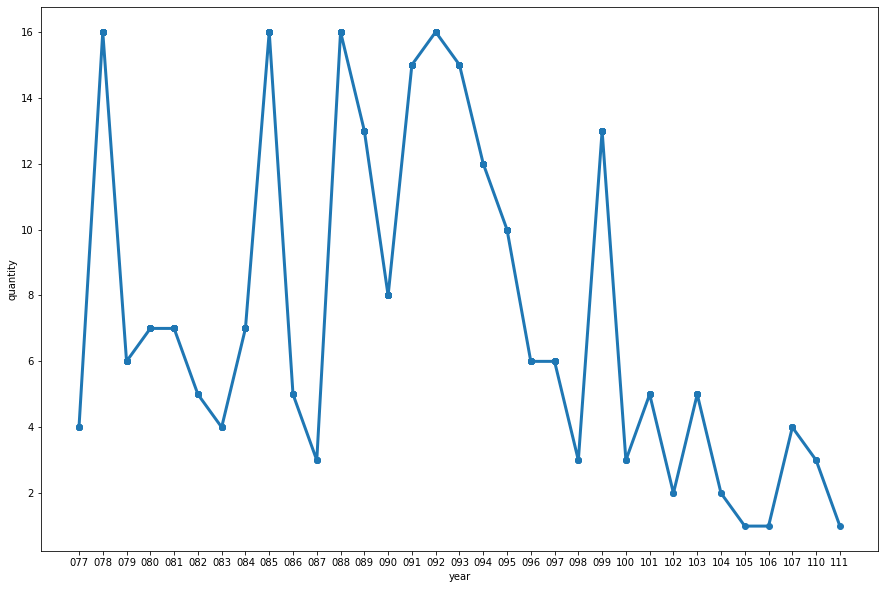

In [8]:
rcParams["figure.figsize"] = 15, 10 #調整大小
ok_y=list(okmart_df["count"])
ok_x=list(okmart_df["time"])
plt.plot(ok_x, ok_y, marker='o', linewidth=3)
plt.xlabel("year")
plt.ylabel("quantity")
plt.ylim = (0,90)
plt.show()

## 7-11 

In [9]:
def seveneleven(compilation):
    if compilation == 22555003:
        return True
    else:
        return False
seveneleven = df["公司統一編號"].apply(seveneleven)
seveneleven_df = df[seveneleven]

listed=[]
for i in seveneleven_df["分公司地址"]:
    city = list(i)[0:3]
    city="".join(city)
    #print(city)
    listed.append(city)
    

    
# print(listed)
# cities = "".join(listed)
# print(cities, end="\n")

seveneleven_df.insert(loc=8, column="city", value=listed)

def intaipei(city):
    if "臺北市" in city:
        return True
    else:
        return False


taipei = seveneleven_df["分公司地址"].apply(intaipei)
seveneleven_df_taipei = seveneleven_df[taipei]
seveneleven_df_taipei

listed_time = []
for i in seveneleven_df_taipei["分公司核准設立日期"]:
    c = list(i)[0:3]
    listed_time.append((i)[0:3])
listed_time
seveneleven_df_taipei.insert(loc=9, column="time", value=listed_time)


seveneleven_df = seveneleven_df_taipei.sort_values(by="分公司核准設立日期")
seveneleven_df_1 = seveneleven_df
seveneleven_df

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time
2276,22555003,統一超商股份有限公司,22555741,台北市第４７分公司,臺北市大安區信義路四段265巷12弄1號1樓,1,0760618,1051230,臺北市,076
2248,22555003,統一超商股份有限公司,22555469,台北市第十九分公司,臺北市信義區臺北市永吉路32、34號1樓,1,0760618,1000530,臺北市,076
2247,22555003,統一超商股份有限公司,22555453,臺北市第十八分公司,臺北市信義區基隆路二段22號1樓,1,0760618,1051230,臺北市,076
2246,22555003,統一超商股份有限公司,22555448,臺北市第十七分公司,臺北市信義區忠孝東路五段386號1樓,1,0760618,1051230,臺北市,076
2245,22555003,統一超商股份有限公司,22555432,台北市第１６分公司,臺北市松信路１４５號１樓,1,0760618,0861205,臺北市,076
...,...,...,...,...,...,...,...,...,...,...
9794,22555003,統一超商股份有限公司,90209037,台北市第一０七七分公司,臺北市北投區文林北路260號1樓,1,1110419,,臺北市,111
9780,22555003,統一超商股份有限公司,90203293,台北市第一０七八分公司,臺北市中正區信陽街9、11號1樓,1,1110512,,臺北市,111
9831,22555003,統一超商股份有限公司,90269864,台北市第一０八二分公司,臺北市士林區重慶北路4段177號1樓,1,1110527,,臺北市,111
9830,22555003,統一超商股份有限公司,90269858,台北市第一０八一分公司,臺北市中山區中山北路2段11巷11號1樓,1,1110527,,臺北市,111


In [10]:
seveneleven_df = seveneleven_df.sort_values(by="分公司核准設立日期")
seveneleven_df

listed=[]
for i in seveneleven_df["分公司地址"]:
#     print(i)
    area = list(i)[3:6]
    area="".join(area)
    listed.append(area)

seveneleven_df.insert(loc=9, column="area", value=listed)
seveneleven_df


,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area,time
2276,22555003,統一超商股份有限公司,22555741,台北市第４７分公司,臺北市大安區信義路四段265巷12弄1號1樓,1,0760618,1051230,臺北市,大安區,076
2273,22555003,統一超商股份有限公司,22555714,臺北市第４４分公司,臺北市和平東路三段３０８巷３０號１樓,1,0760618,,臺北市,和平東,076
2272,22555003,統一超商股份有限公司,22555708,台北市第四十三分公司,臺北市環河南路二段２４２、２４２–１號１樓,3,0760618,0871113,臺北市,環河南,076
2271,22555003,統一超商股份有限公司,22555691,台北市第四十二分公司,臺北市和平西路一段１００號１樓,3,0760618,0920307,臺北市,和平西,076
2270,22555003,統一超商股份有限公司,22555685,台北市第４１分公司,臺北市和平東路一段２１２號１樓,3,0760618,0910321,臺北市,和平東,076
...,...,...,...,...,...,...,...,...,...,...,...
9794,22555003,統一超商股份有限公司,90209037,台北市第一０七七分公司,臺北市北投區文林北路260號1樓,1,1110419,,臺北市,北投區,111
9780,22555003,統一超商股份有限公司,90203293,台北市第一０七八分公司,臺北市中正區信陽街9、11號1樓,1,1110512,,臺北市,中正區,111
9830,22555003,統一超商股份有限公司,90269858,台北市第一０八一分公司,臺北市中山區中山北路2段11巷11號1樓,1,1110527,,臺北市,中山區,111
9831,22555003,統一超商股份有限公司,90269864,台北市第一０八二分公司,臺北市士林區重慶北路4段177號1樓,1,1110527,,臺北市,士林區,111


In [19]:
seveneleven_group_df =  seveneleven_df.groupby("area")
seveneleven_group_df.agg("count")

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time
area,,,,,,,,,,
一江街,1,1,1,1,1,1,1,1,1,1
中和街,1,1,1,1,1,1,1,1,1,1
中坡南,1,1,1,1,1,1,1,1,1,1
中山北,9,9,9,9,9,9,9,9,9,9
中山區,156,156,156,156,156,156,156,156,156,156
...,...,...,...,...,...,...,...,...,...,...
長安西,1,1,1,1,1,1,1,1,1,1
長春路,1,1,1,1,1,1,1,1,1,1
雙城街,1,1,1,1,1,1,1,1,1,1


## 篩選 使用統編篩選全家

In [11]:
def familymart(compilation):
    if compilation == 23060248:
        return True
    else:
        return False
familymart = df["公司統一編號"].apply(familymart)
familymart_df = df[familymart]
familymart_df

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期
12263,23060248,全家便利商店股份有限公司,16080205,新竹大竹分公司,新竹市磐石里西大路８４８號１樓,1,0860419,0920605
12264,23060248,全家便利商店股份有限公司,16080211,新竹雅富分公司,新竹市西雅里延平路一段１２１號１樓,3,0860419,0920605
12265,23060248,全家便利商店股份有限公司,16080227,台中公園分公司,臺中市中區光復里公園路二十一號、二十一號之一、一樓,3,0860419,0920605
12266,23060248,全家便利商店股份有限公司,16080232,彰化永福分公司,彰化縣彰化市永福里光復路一號一樓,3,0860419,0920605
12267,23060248,全家便利商店股份有限公司,16080248,台南崇學分公司,臺南市東區龍山里崇學路５，７號１樓,3,0860419,0900301
...,...,...,...,...,...,...,...,...
17572,23060248,全家便利商店股份有限公司,97178615,高雄九如分公司,高雄市三民區寶盛里九如一路５１５號１樓,3,0860328,0890225
17573,23060248,全家便利商店股份有限公司,97178621,武昌分公司,臺北市萬華區武昌街二段一一四之五號一樓,3,0860328,0920930
17574,23060248,全家便利商店股份有限公司,97178636,羅中分公司,臺北市大安區羅斯福路2段17號1樓,1,0860328,1060215
17575,23060248,全家便利商店股份有限公司,97178642,三重五華分公司,新北市三重區五華里五華街89號1樓,1,0860328,1060216


## 篩選台北市店家

## 新增城市欄位 

In [12]:
listed=[]
for i in familymart_df["分公司地址"]:
    city = list(i)[0:3]
    city="".join(city)
    #print(city)
    listed.append(city)
    
#print(listed)
#cities = "".join(listed)
#print(cities, end="\n")

familymart_df.insert(loc=8, column="city", value=listed)
familymart_df

 
    

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city
12263,23060248,全家便利商店股份有限公司,16080205,新竹大竹分公司,新竹市磐石里西大路８４８號１樓,1,0860419,0920605,新竹市
12264,23060248,全家便利商店股份有限公司,16080211,新竹雅富分公司,新竹市西雅里延平路一段１２１號１樓,3,0860419,0920605,新竹市
12265,23060248,全家便利商店股份有限公司,16080227,台中公園分公司,臺中市中區光復里公園路二十一號、二十一號之一、一樓,3,0860419,0920605,臺中市
12266,23060248,全家便利商店股份有限公司,16080232,彰化永福分公司,彰化縣彰化市永福里光復路一號一樓,3,0860419,0920605,彰化縣
12267,23060248,全家便利商店股份有限公司,16080248,台南崇學分公司,臺南市東區龍山里崇學路５，７號１樓,3,0860419,0900301,臺南市
...,...,...,...,...,...,...,...,...,...
17572,23060248,全家便利商店股份有限公司,97178615,高雄九如分公司,高雄市三民區寶盛里九如一路５１５號１樓,3,0860328,0890225,高雄市
17573,23060248,全家便利商店股份有限公司,97178621,武昌分公司,臺北市萬華區武昌街二段一一四之五號一樓,3,0860328,0920930,臺北市
17574,23060248,全家便利商店股份有限公司,97178636,羅中分公司,臺北市大安區羅斯福路2段17號1樓,1,0860328,1060215,臺北市
17575,23060248,全家便利商店股份有限公司,97178642,三重五華分公司,新北市三重區五華里五華街89號1樓,1,0860328,1060216,新北市


## 利用新增city欄位 篩選出台北市店家

In [13]:
def intaipei(city):
    if "臺北市" in city:
        return True
    else:
        return False


taipei = familymart_df["分公司地址"].apply(intaipei)
familymart_df_taipei = familymart_df[taipei]
familymart_df_taipei

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city
12268,23060248,全家便利商店股份有限公司,16080660,康定分公司,臺北市萬華區康定路73號1樓,1,0860423,1060215,臺北市
12272,23060248,全家便利商店股份有限公司,16080985,文化分公司,臺北市北投區中央北路2段97號1樓,1,0860428,1060216,臺北市
12274,23060248,全家便利商店股份有限公司,16082409,興業分公司,臺北市文山區興隆路2段279號1樓,1,0860519,1060216,臺北市
12278,23060248,全家便利商店股份有限公司,16082885,興雅分公司,臺北市信義區虎林街二二二巷七十九號一樓,3,0860524,0920606,臺北市
12305,23060248,全家便利商店股份有限公司,16087853,景興分公司,臺北市文山區興隆路1段249號1樓,1,0860723,1060216,臺北市
...,...,...,...,...,...,...,...,...,...
17564,23060248,全家便利商店股份有限公司,97176638,長林分公司,臺北市中山區林森北路107巷54號1樓,1,0860303,1060217,臺北市
17565,23060248,全家便利商店股份有限公司,97176644,萬安分公司,臺北市文山區萬芳里萬安街十七號一樓,3,0860303,0920606,臺北市
17566,23060248,全家便利商店股份有限公司,97176659,興園分公司,臺北市文山區興業里興隆路2段220巷33號1樓,1,0860303,1060216,臺北市
17573,23060248,全家便利商店股份有限公司,97178621,武昌分公司,臺北市萬華區武昌街二段一一四之五號一樓,3,0860328,0920930,臺北市


In [14]:
familymart_df = familymart_df_taipei.sort_values(by="分公司核准設立日期")
familymart_df = familymart_df.drop(index=17086)
familymart_df

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city
12686,23060248,全家便利商店股份有限公司,23167001,星雲分公司,臺北市內湖區星雲路十號一樓,3,0771012,0920606,臺北市
12688,23060248,全家便利商店股份有限公司,23167023,中崙分公司,臺北市松山區八德路三段74巷43號1樓,1,0771012,1060215,臺北市
12687,23060248,全家便利商店股份有限公司,23167017,延吉分公司,臺北市大安區忠孝東路四段216巷31號1樓,1,0771012,1060217,臺北市
12684,23060248,全家便利商店股份有限公司,23060985,信義分公司,臺北市信義路三段２００號１樓,3,0771012,,臺北市
12685,23060248,全家便利商店股份有限公司,23060991,雙連分公司,臺北市民生西路１３８號１樓,3,0771012,,臺北市
...,...,...,...,...,...,...,...,...,...
17350,23060248,全家便利商店股份有限公司,90677778,台北市第七四三分公司,臺北市中山區集英里民生西路33號1樓及45巷3弄4號1樓,1,1110127,,臺北市
17316,23060248,全家便利商店股份有限公司,90604585,台北市第七四四分公司,臺北市信義區永春里中坡北路25號,1,1110214,,臺北市
17340,23060248,全家便利商店股份有限公司,90671079,台北市第七四五分公司,臺北市大安區建安里忠孝東路四段181巷6號1樓,1,1110303,,臺北市
17341,23060248,全家便利商店股份有限公司,90671084,台北市第七四六分公司,臺北市大同區老師里重慶北路三段278之2號1樓,1,1110303,,臺北市


In [15]:
listed_time = []
for i in familymart_df["分公司核准設立日期"]:
    c = list(i)[0:3]
    listed_time.append((i)[0:3])
listed_time
familymart_df.insert(loc=9, column="time", value=listed_time)
familymart_df

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time
12686,23060248,全家便利商店股份有限公司,23167001,星雲分公司,臺北市內湖區星雲路十號一樓,3,0771012,0920606,臺北市,077
12688,23060248,全家便利商店股份有限公司,23167023,中崙分公司,臺北市松山區八德路三段74巷43號1樓,1,0771012,1060215,臺北市,077
12687,23060248,全家便利商店股份有限公司,23167017,延吉分公司,臺北市大安區忠孝東路四段216巷31號1樓,1,0771012,1060217,臺北市,077
12684,23060248,全家便利商店股份有限公司,23060985,信義分公司,臺北市信義路三段２００號１樓,3,0771012,,臺北市,077
12685,23060248,全家便利商店股份有限公司,23060991,雙連分公司,臺北市民生西路１３８號１樓,3,0771012,,臺北市,077
...,...,...,...,...,...,...,...,...,...,...
17350,23060248,全家便利商店股份有限公司,90677778,台北市第七四三分公司,臺北市中山區集英里民生西路33號1樓及45巷3弄4號1樓,1,1110127,,臺北市,111
17316,23060248,全家便利商店股份有限公司,90604585,台北市第七四四分公司,臺北市信義區永春里中坡北路25號,1,1110214,,臺北市,111
17340,23060248,全家便利商店股份有限公司,90671079,台北市第七四五分公司,臺北市大安區建安里忠孝東路四段181巷6號1樓,1,1110303,,臺北市,111
17341,23060248,全家便利商店股份有限公司,90671084,台北市第七四六分公司,臺北市大同區老師里重慶北路三段278之2號1樓,1,1110303,,臺北市,111


In [16]:
count_list = []
for i in familymart_df["time"]:
    count_list.append(i)
from collections import Counter
temp = Counter(count_list)
c = temp.most_common()
c.sort()
c = dict(c)
pd_list=[]
for i in familymart_df["time"]:
    pd_list.append(c[i])
pd_list
# familymart_df.insert(loc=10, column="count", value=pd_list)

familymart_df

listed=[]
for i in familymart_df["分公司地址"]:
#     print(i)
    area = list(i)[3:6]
    area="".join(area)
    listed.append(area)

familymart_df.insert(loc=10, column="area", value=listed)
familymart_df

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time,area
12686,23060248,全家便利商店股份有限公司,23167001,星雲分公司,臺北市內湖區星雲路十號一樓,3,0771012,0920606,臺北市,077,內湖區
12688,23060248,全家便利商店股份有限公司,23167023,中崙分公司,臺北市松山區八德路三段74巷43號1樓,1,0771012,1060215,臺北市,077,松山區
12687,23060248,全家便利商店股份有限公司,23167017,延吉分公司,臺北市大安區忠孝東路四段216巷31號1樓,1,0771012,1060217,臺北市,077,大安區
12684,23060248,全家便利商店股份有限公司,23060985,信義分公司,臺北市信義路三段２００號１樓,3,0771012,,臺北市,077,信義路
12685,23060248,全家便利商店股份有限公司,23060991,雙連分公司,臺北市民生西路１３８號１樓,3,0771012,,臺北市,077,民生西
...,...,...,...,...,...,...,...,...,...,...,...
17350,23060248,全家便利商店股份有限公司,90677778,台北市第七四三分公司,臺北市中山區集英里民生西路33號1樓及45巷3弄4號1樓,1,1110127,,臺北市,111,中山區
17316,23060248,全家便利商店股份有限公司,90604585,台北市第七四四分公司,臺北市信義區永春里中坡北路25號,1,1110214,,臺北市,111,信義區
17340,23060248,全家便利商店股份有限公司,90671079,台北市第七四五分公司,臺北市大安區建安里忠孝東路四段181巷6號1樓,1,1110303,,臺北市,111,大安區
17341,23060248,全家便利商店股份有限公司,90671084,台北市第七四六分公司,臺北市大同區老師里重慶北路三段278之2號1樓,1,1110303,,臺北市,111,大同區


In [17]:
familymart_group_df =  familymart_df.groupby("area")
familymart_group_df.agg("count")

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time
area,,,,,,,,,,
中山北,2,2,2,2,2,2,2,2,2,2
中山區,143,143,143,143,143,143,143,143,143,143
中正區,87,87,87,87,87,87,87,87,87,87
仁愛路,1,1,1,1,1,1,1,1,1,1
信義區,70,70,70,70,70,70,70,70,70,70
信義路,1,1,1,1,1,1,1,1,1,1
內湖區,67,67,67,67,67,67,67,67,67,67
內湖路,1,1,1,1,1,1,1,1,1,1
北投區,47,47,47,47,47,47,47,47,47,47


In [26]:
def Songshan(city):
    if "松山區" in city:
        return True
    else:
        return False


songshan = familymart_df["area"].apply(Songshan)
familymart_songshan = familymart_df[songshan]
familymart_songshan
familymart_songshan = familymart_songshan.sort_values(by="分公司核准設立日期")
familymart_songshan
familymart_songshan.to_csv("familymart_df.csv", index = False)
familymart_songshan

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,time,area
12688,23060248,全家便利商店股份有限公司,23167023,中崙分公司,臺北市松山區八德路三段74巷43號1樓,1,0771012,1060215,臺北市,077,松山區
17071,23060248,全家便利商店股份有限公司,86381746,豐禾分公司,臺北市松山區民生東路三段130巷5弄2號1樓,1,0801204,1060217,臺北市,080,松山區
16990,23060248,全家便利商店股份有限公司,84307460,中央分公司,臺北市松山區民生東路四段95號、97巷1號1樓,1,0820719,1060217,臺北市,082,松山區
17008,23060248,全家便利商店股份有限公司,84308876,撫遠分公司,臺北市松山區新東街六十巷十七路一樓,3,0821202,0920606,臺北市,082,松山區
17016,23060248,全家便利商店股份有限公司,84309333,慶城分公司,臺北市松山區慶城街２１之１號１樓,1,0830107,0830305,臺北市,083,松山區
...,...,...,...,...,...,...,...,...,...,...,...
15664,23060248,全家便利商店股份有限公司,54916439,台北市第六七二分公司,臺北市松山區敦化里八德路3段74巷10號1、2樓,1,1081005,,臺北市,108,松山區
16904,23060248,全家便利商店股份有限公司,83531010,台北市第六八O分公司,臺北市松山區中正里敦化北路120巷22號1樓,3,1081227,,臺北市,108,松山區
16797,23060248,全家便利商店股份有限公司,83189351,台北市第七O三分公司,臺北市松山區富泰里民生東路五段204-3號、204-4號、204-5號、204-6號、204...,1,1091008,,臺北市,109,松山區
17384,23060248,全家便利商店股份有限公司,90884185,台北市第七二二分公司,臺北市松山區慈祐里八德路四段676號、678號,1,1100426,,臺北市,110,松山區


## 找出台北市 行政區

In [27]:
listed=[]
for i in familymart_df_taipei["分公司地址"]:
#     print(i)
    area = list(i)[3:6]
    area="".join(area)
    listed.append(area)

familymart_df_taipei.insert(loc=9, column="area", value=listed)
familymart_df_taipei

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12268,23060248,全家便利商店股份有限公司,16080660,康定分公司,臺北市萬華區康定路73號1樓,1,0860423,1060215,臺北市,萬華區
12272,23060248,全家便利商店股份有限公司,16080985,文化分公司,臺北市北投區中央北路2段97號1樓,1,0860428,1060216,臺北市,北投區
12274,23060248,全家便利商店股份有限公司,16082409,興業分公司,臺北市文山區興隆路2段279號1樓,1,0860519,1060216,臺北市,文山區
12278,23060248,全家便利商店股份有限公司,16082885,興雅分公司,臺北市信義區虎林街二二二巷七十九號一樓,3,0860524,0920606,臺北市,信義區
12305,23060248,全家便利商店股份有限公司,16087853,景興分公司,臺北市文山區興隆路1段249號1樓,1,0860723,1060216,臺北市,文山區
...,...,...,...,...,...,...,...,...,...,...
17564,23060248,全家便利商店股份有限公司,97176638,長林分公司,臺北市中山區林森北路107巷54號1樓,1,0860303,1060217,臺北市,中山區
17565,23060248,全家便利商店股份有限公司,97176644,萬安分公司,臺北市文山區萬芳里萬安街十七號一樓,3,0860303,0920606,臺北市,文山區
17566,23060248,全家便利商店股份有限公司,97176659,興園分公司,臺北市文山區興業里興隆路2段220巷33號1樓,1,0860303,1060216,臺北市,文山區
17573,23060248,全家便利商店股份有限公司,97178621,武昌分公司,臺北市萬華區武昌街二段一一四之五號一樓,3,0860328,0920930,臺北市,萬華區


##  中山區

In [29]:
def Zhongshan(city):
    if "中山區" in city:
        return True
    else:
        return False


zhongshan = familymart_df_taipei["area"].apply(Zhongshan)
familymart_df_taipei_zhongshan = familymart_df_taipei[zhongshan]
familymart_df_taipei_zhongshan

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12324,23060248,全家便利商店股份有限公司,16090111,中興分公司,臺北市中山區龍江路201號1樓,1,0860825,1060216,臺北市,中山區
12362,23060248,全家便利商店股份有限公司,16098747,林森分公司,臺北市中山區志新里林森北路六四四號一樓,3,0861120,0920605,臺北市,中山區
12387,23060248,全家便利商店股份有限公司,16435564,晴光分公司,臺北市中山區農安街二之三號一樓,3,0870112,0920605,臺北市,中山區
12472,23060248,全家便利商店股份有限公司,16450213,國賓分公司,臺北市中山區中山北路二段五十九之二號一樓,3,0870612,0920606,臺北市,中山區
12510,23060248,全家便利商店股份有限公司,16639504,松花分公司,臺北市中山區松江路九十五之一號一樓,3,0870824,,臺北市,中山區
...,...,...,...,...,...,...,...,...,...,...
17476,23060248,全家便利商店股份有限公司,96978575,大林分公司,臺北市中山區林森北路１３１號１樓,3,0850524,0900605,臺北市,中山區
17479,23060248,全家便利商店股份有限公司,96978603,長春分公司,臺北市中山區長春路48號1樓,1,0850524,1060215,臺北市,中山區
17506,23060248,全家便利商店股份有限公司,97164730,龍江二分公司,臺北市中山區龍江路八十五號１樓,6,0850905,0850905,臺北市,中山區
17545,23060248,全家便利商店股份有限公司,97171697,永琦分公司,臺北市中山區南京東路二段四十九號１樓,3,0851216,0901206,臺北市,中山區


##  中正區

In [31]:
def Zhongzheng(city):
    if "中正區" in city:
        return True
    else:
        return False


zhongzheng = familymart_df_taipei["area"].apply(Zhongzheng)
familymart_df_taipei_zhongzheng = familymart_df_taipei[zhongzheng]
zhongzheng_time = familymart_df_taipei_zhongzheng.sort_values(by="分公司核准設立日期")
zhongzheng_time

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12734,23060248,全家便利商店股份有限公司,23528482,公館分公司,臺北市中正區汀州路3段251號1１樓,1,0790502,1060216,臺北市,中正區
12742,23060248,全家便利商店股份有限公司,23928683,林森南路分公司,臺北市中正區林森南路57號1樓,1,0791101,1060215,臺北市,中正區
12773,23060248,全家便利商店股份有限公司,23932223,南陽分公司,臺北市中正區信陽街15號1樓,1,0800816,1060217,臺北市,中正區
17065,23060248,全家便利商店股份有限公司,86381083,南昌分公司,臺北市中正區南昌路一段六十六號一樓,3,0801021,0950119,臺北市,中正區
17007,23060248,全家便利商店股份有限公司,84308799,羅福分公司,臺北市中正區羅斯福路三段二三八號一樓,3,0821122,0930708,臺北市,中正區
...,...,...,...,...,...,...,...,...,...,...
17365,23060248,全家便利商店股份有限公司,90728283,台北市第七一三分公司,臺北市中正區黎明里南陽街1號,1,1100311,,臺北市,中正區
17392,23060248,全家便利商店股份有限公司,90890686,台北市第七二○分公司,臺北市中正區網溪里廈門街113巷17號1樓,1,1100416,,臺北市,中正區
17330,23060248,全家便利商店股份有限公司,90639959,台北市第七三三分公司,臺北市中正區黎明里許昌街14號1樓及公園路20巷7號1樓,1,1101203,,臺北市,中正區
17324,23060248,全家便利商店股份有限公司,90620585,台北市第七四一分公司,臺北市中正區文盛里羅斯福路三段244巷7號1樓,1,1110105,,臺北市,中正區


## 大同區

In [35]:
def Datong(city):
    if "大同區" in city:
        return True
    else:
        return False


datong = familymart_df_taipei["area"].apply(Datong)
familymart_datong = familymart_df_taipei[datong]
familymart_datong

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12511,23060248,全家便利商店股份有限公司,16639510,寧夏分公司,臺北市大同區寧夏路28號、30號1樓,1,0870824,1060217,臺北市,大同區
12563,23060248,全家便利商店股份有限公司,16830930,福澤分公司,臺北市大同區民權西路146號1樓,1,0871215,1060216,臺北市,大同區
12647,23060248,全家便利商店股份有限公司,16844054,保生分公司,臺北市大同區重慶北路三段三三三號一樓,3,0880517,0920606,臺北市,大同區
12720,23060248,全家便利商店股份有限公司,23525963,延平分公司,臺北市大同區隆和里延平北路三段六十一之四號、六十一之五號一樓,3,0781114,0931209,臺北市,大同區
12958,23060248,全家便利商店股份有限公司,24813301,台北市第六三五分公司,臺北市大同區建功里長安西路258號1樓,1,1070927,,臺北市,大同區
13014,23060248,全家便利商店股份有限公司,24816412,台北市第六四三分公司,臺北市大同區光能里南京西路61號1樓,1,1080109,,臺北市,大同區
13163,23060248,全家便利商店股份有限公司,27239414,長德分公司,臺北市大同區建功里長安西路五十五號一樓,3,0930721,,臺北市,大同區
13353,23060248,全家便利商店股份有限公司,27259240,稻埕分公司,臺北市大同區朝陽里延平北路２段９１號１樓,3,0940712,,臺北市,大同區
13785,23060248,全家便利商店股份有限公司,28422121,福安分公司,臺北市大同區建明里長安西路54號1樓,1,0960921,1060217,臺北市,大同區
13805,23060248,全家便利商店股份有限公司,28422419,日新分公司,臺北市大同區光能里承德路2段39號、41號1樓,1,0960927,1060216,臺北市,大同區


## 萬華區

In [36]:
def Wanhua(city):
    if "萬華區" in city:
        return True
    else:
        return False


wanhua = familymart_df_taipei["area"].apply(Wanhua)
familymart_wanhua = familymart_df_taipei[wanhua]
familymart_wanhua

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12268,23060248,全家便利商店股份有限公司,16080660,康定分公司,臺北市萬華區康定路73號1樓,1,0860423,1060215,臺北市,萬華區
12376,23060248,全家便利商店股份有限公司,16434609,龍山分公司,臺北市萬華區康定路１８９號１樓,3,0861231,0861231,臺北市,萬華區
12416,23060248,全家便利商店股份有限公司,16440665,環南分公司,臺北市萬華區環河南路2段298號1樓,1,0870319,1060216,臺北市,萬華區
12651,23060248,全家便利商店股份有限公司,16844532,吉利分公司,臺北市萬華區東園街12號1樓,3,0880525,1060215,臺北市,萬華區
12655,23060248,全家便利商店股份有限公司,16845005,萬華分公司,臺北市萬華區雙園街六十九號一樓,3,0880528,0920603,臺北市,萬華區
12736,23060248,全家便利商店股份有限公司,23529481,寶興分公司,臺北市萬華區寶興街78號1樓,1,0790720,1060216,臺北市,萬華區
12834,23060248,全家便利商店股份有限公司,24795866,台北市第五四九分公司,臺北市萬華區保德里東園街172號、174號及長泰街132號1樓,1,1040731,1060215,臺北市,萬華區
12911,23060248,全家便利商店股份有限公司,24808139,台北市第五五九分公司,臺北市萬華區青山里廣州街235-1號、235-2號,1,1050308,1060215,臺北市,萬華區
12945,23060248,全家便利商店股份有限公司,24812112,台北市第五七三分公司,臺北市萬華區富福里西園路1段159號、161號1樓,1,1050808,1060215,臺北市,萬華區
12966,23060248,全家便利商店股份有限公司,24813885,台北市第六三七分公司,臺北市萬華區福星里漢口街2段67之2號1樓及昆明街58之6號1樓,1,1071016,,臺北市,萬華區


## 文山區

In [37]:
def Wenshan(city):
    if "文山區" in city:
        return True
    else:
        return False


wenshan = familymart_df_taipei["area"].apply(Wenshan)
familymart_wenshan = familymart_df_taipei[wenshan]
familymart_wenshan

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12274,23060248,全家便利商店股份有限公司,16082409,興業分公司,臺北市文山區興隆路2段279號1樓,1,0860519,1060216,臺北市,文山區
12305,23060248,全家便利商店股份有限公司,16087853,景興分公司,臺北市文山區興隆路1段249號1樓,1,0860723,1060216,臺北市,文山區
12473,23060248,全家便利商店股份有限公司,16450229,興欣分公司,臺北市文山區興隆路2段205號1樓,3,0870612,0920606,臺北市,文山區
12523,23060248,全家便利商店股份有限公司,16742373,景文分公司,臺北市文山區景文街83號1樓,1,0870916,1060215,臺北市,文山區
12692,23060248,全家便利商店股份有限公司,23167430,木柵路分公司,臺北市文山區木柵路3段148號1樓,1,0771121,1060216,臺北市,文山區
12910,23060248,全家便利商店股份有限公司,24808124,台北市第五五八分公司,臺北市文山區興豐里興隆路2段75號、77號、79號,1,1050308,1060216,臺北市,文山區
13038,23060248,全家便利商店股份有限公司,24817812,台北市第六五二分公司,臺北市文山區景行里景興路282巷2號1樓,1,1080409,,臺北市,文山區
13047,23060248,全家便利商店股份有限公司,27230814,試院分公司,臺北市文山區試院里木柵路1段91號、93號1樓,1,0930113,1060216,臺北市,文山區
13118,23060248,全家便利商店股份有限公司,27235070,萬隆分公司,臺北市文山區萬祥里羅斯福路五段二六三號一樓,3,0930415,,臺北市,文山區
13692,23060248,全家便利商店股份有限公司,28413235,明興分公司,臺北市文山區明興里木柵路2段109巷25弄2號、2之1號1樓,1,0960410,1060215,臺北市,文山區


## 南港區

In [38]:
def Nangang(city):
    if "南港區" in city:
        return True
    else:
        return False


nangang = familymart_df_taipei["area"].apply(Nangang)
familymart_nangang = familymart_df_taipei[nangang]
familymart_nangang

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12766,23060248,全家便利商店股份有限公司,23931414,玉成分公司,臺北市南港區玉成街１５４號１樓,3,0800620,0870504,臺北市,南港區
12912,23060248,全家便利商店股份有限公司,24808460,台北市第五五七分公司,臺北市南港區舊莊街1段169號及145巷2弄22號,1,1050314,1060217,臺北市,南港區
13019,23060248,全家便利商店股份有限公司,24816709,台北市第六四五分公司,臺北市南港區三重里經貿二路200號1樓,1,1080304,,臺北市,南港區
13176,23060248,全家便利商店股份有限公司,27240475,工業二分公司,臺北市南港區三重里園區街3號2樓之7,1,0930806,1060217,臺北市,南港區
13530,23060248,全家便利商店股份有限公司,27938830,向陽分公司,臺北市南港區東新里重陽路16號1樓,1,0950505,1060217,臺北市,南港區
13782,23060248,全家便利商店股份有限公司,28422092,研究院分公司,臺北市南港區研究院路2段70巷1號1樓,1,0960921,1060217,臺北市,南港區
13831,23060248,全家便利商店股份有限公司,28422781,國興分公司,臺北市南港區中研里舊莊街1段3巷3弄2號1樓,1,0960928,1060217,臺北市,南港區
13899,23060248,全家便利商店股份有限公司,28425582,港福分公司,臺北市南港區仁福里福德街373巷63號,1,0961112,1060217,臺北市,南港區
14041,23060248,全家便利商店股份有限公司,28973237,工業三分公司,臺北市南港區三重里三重路66之2號1樓,1,0971223,1060217,臺北市,南港區
14182,23060248,全家便利商店股份有限公司,28989884,成鑫分公司,臺北市南港區玉成街178號1樓,3,0990108,,臺北市,南港區


## 內湖區

In [39]:
def Neihu(city):
    if "內湖區" in city:
        return True
    else:
        return False


neihu = familymart_df_taipei["area"].apply(Neihu)
familymart_neihu = familymart_df_taipei[neihu]
familymart_neihu

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12382,23060248,全家便利商店股份有限公司,16435353,湖安分公司,臺北市內湖區內湖路1段285巷19號1樓,1,0870109,1060215,臺北市,內湖區
12625,23060248,全家便利商店股份有限公司,16840016,港墘分公司,臺北市內湖區港墘路四十四號一樓,3,0880406,0920606,臺北市,內湖區
12686,23060248,全家便利商店股份有限公司,23167001,星雲分公司,臺北市內湖區星雲路十號一樓,3,0771012,0920606,臺北市,內湖區
12703,23060248,全家便利商店股份有限公司,23225608,東湖分公司,臺北市內湖區東湖路４５號１樓,3,0780513,,臺北市,內湖區
12714,23060248,全家便利商店股份有限公司,23226894,三民分公司,臺北市內湖區民權東路6段90巷1號1樓,1,0780821,1060216,臺北市,內湖區
...,...,...,...,...,...,...,...,...,...,...
17241,23060248,全家便利商店股份有限公司,90217938,台北市第七三五分公司,臺北市內湖區湖興里成功路二段320巷28號1樓,1,1101216,,臺北市,內湖區
17243,23060248,全家便利商店股份有限公司,90217971,台北市第七三六分公司,臺北市內湖區西康里文湖街21巷7號1樓,1,1101216,,臺北市,內湖區
17246,23060248,全家便利商店股份有限公司,90218015,台北市第七三八分公司,臺北市內湖區葫洲里民權東路六段296巷70號1樓,1,1101216,,臺北市,內湖區
17329,23060248,全家便利商店股份有限公司,90639923,台北市第七三四分公司,臺北市內湖區湖元里舊宗路一段130號1樓,1,1101203,,臺北市,內湖區


## 士林區

In [40]:
def Shilin(city):
    if "士林區" in city:
        return True
    else:
        return False


shilin = familymart_df_taipei["area"].apply(Shilin)
familymart_shilin = familymart_df_taipei[shilin]
familymart_shilin

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12345,23060248,全家便利商店股份有限公司,16094658,後港分公司,臺北市士林區福港街二十八號一樓,3,0861003,0920605,臺北市,士林區
12430,23060248,全家便利商店股份有限公司,16442805,大南分公司,臺北市士林區大南路52號1樓,1,0870408,1060215,臺北市,士林區
12487,23060248,全家便利商店股份有限公司,16633369,中山分公司,臺北市士林區中山北路五段六一六號一樓,3,0870714,0920806,臺北市,士林區
12522,23060248,全家便利商店股份有限公司,16742367,通河分公司,臺北市士林區通河街145號1樓,1,0870916,1060216,臺北市,士林區
12548,23060248,全家便利商店股份有限公司,16748355,永新分公司,臺北市士林區社子街27號1樓,1,0871123,1060216,臺北市,士林區
...,...,...,...,...,...,...,...,...,...,...
17203,23060248,全家便利商店股份有限公司,89407621,仰德分公司,臺北市士林區仰德大道三段六十八，七十號一樓,3,0841213,0920606,臺北市,士林區
17248,23060248,全家便利商店股份有限公司,90218084,台北市第七三九分公司,臺北市士林區忠誠里中山北路六段88號地下一層之3,1,1101220,,臺北市,士林區
17322,23060248,全家便利商店股份有限公司,90620564,台北市第七四○分公司,臺北市士林區天母里中山北路七段81巷8號1樓,1,1110105,,臺北市,士林區
17366,23060248,全家便利商店股份有限公司,90728328,台北市第七一五分公司,臺北市士林區葫蘆里延平北路五段217號、219號1樓,1,1100315,,臺北市,士林區


## 北投區

In [41]:
def Beitou(city):
    if "北投區" in city:
        return True
    else:
        return False


beitou = familymart_df_taipei["area"].apply(Beitou)
familymart_beitou = familymart_df_taipei[beitou]
familymart_beitou

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12272,23060248,全家便利商店股份有限公司,16080985,文化分公司,臺北市北投區中央北路2段97號1樓,1,0860428,1060216,臺北市,北投區
12314,23060248,全家便利商店股份有限公司,16088895,中和分公司,臺北市北投區中和街四九一號一樓,3,0860807,0920605,臺北市,北投區
12368,23060248,全家便利商店股份有限公司,16099302,中北分公司,臺北市北投區中央北路一段四十四號１樓,3,0861125,0880107,臺北市,北投區
12392,23060248,全家便利商店股份有限公司,16437063,大興分公司,臺北市北投區大興街二十一號１樓,3,0870206,0870206,臺北市,北投區
12426,23060248,全家便利商店股份有限公司,16441279,奇岩分公司,臺北市北投區公館路二五九號一樓,3,0870324,0920606,臺北市,北投區
12516,23060248,全家便利商店股份有限公司,16741682,大業分公司,臺北市北投區大興街22號1樓,1,0870909,1060216,臺北市,北投區
12693,23060248,全家便利商店股份有限公司,23167699,自強分公司,臺北市北投區自強街88號1樓,3,0771209,1060216,臺北市,北投區
12695,23060248,全家便利商店股份有限公司,23224404,石牌分公司,臺北市北投區石牌路二段１６５號１樓,3,0780127,,臺北市,北投區
12942,23060248,全家便利商店股份有限公司,24811704,台北市第五七O分公司,臺北市北投區永和里中山北路七段219巷3弄171號1樓,1,1050802,1060216,臺北市,北投區
13090,23060248,全家便利商店股份有限公司,27233354,中永分公司,臺北市北投區開明里中和街252號1樓,1,0930315,1060217,臺北市,北投區


## 松山區

In [42]:
def Songshan(city):
    if "松山區" in city:
        return True
    else:
        return False


songshan = familymart_df_taipei["area"].apply(Songshan)
familymart_songshan = familymart_df_taipei[songshan]
familymart_songshan
familymart_songshan = familymart_songshan.sort_values(by="分公司核准設立日期")
familymart_songshan
familymart_songshan.to_csv("familymart_df.csv", index = False)

## 信義區

In [45]:
def Xinyi(city):
    if "信義區" in city:
        return True
    else:
        return False


xinyi = familymart_df_taipei["area"].apply(Xinyi)
familymart_xinyi = familymart_df_taipei[xinyi]
familymart_xinyi

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12278,23060248,全家便利商店股份有限公司,16082885,興雅分公司,臺北市信義區虎林街二二二巷七十九號一樓,3,0860524,0920606,臺北市,信義區
12340,23060248,全家便利商店股份有限公司,16093150,世貿分公司,臺北市信義區信義路四段四０五號一樓,3,0860922,0920530,臺北市,信義區
12383,23060248,全家便利商店股份有限公司,16435369,松吉分公司,臺北市信義區永吉路１７７號１樓,3,0870109,0910903,臺北市,信義區
12397,23060248,全家便利商店股份有限公司,16438035,東吉分公司,臺北市信義區永吉路３３０號１樓,3,0870217,0890816,臺北市,信義區
12408,23060248,全家便利商店股份有限公司,16439908,永孝分公司,臺北市信義區松信路145號1樓,1,0870311,1060215,臺北市,信義區
...,...,...,...,...,...,...,...,...,...,...
17261,23060248,全家便利商店股份有限公司,90413278,台北市第七三二分公司,臺北市信義區嘉興里基隆路二段113之2號、115號,1,1101109,,臺北市,信義區
17316,23060248,全家便利商店股份有限公司,90604585,台北市第七四四分公司,臺北市信義區永春里中坡北路25號,1,1110214,,臺北市,信義區
17380,23060248,全家便利商店股份有限公司,90884122,台北市第七二一分公司,臺北市信義區景聯里莊敬路190號1樓及地下室,1,1100412,,臺北市,信義區
17483,23060248,全家便利商店股份有限公司,97160278,永春分公司,臺北市信義區信義路６段２８號１樓,3,0850619,0941207,臺北市,信義區


## 大安區

In [49]:
def Daan(city):
    if "大安區" in city:
        return True
    else:
        return False


daan = familymart_df_taipei["area"].apply(Daan)
familymart_daan = familymart_df_taipei[daan]
familymart_daan

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態,分公司核准設立日期,分公司最後核准變更日期,city,area
12349,23060248,全家便利商店股份有限公司,16095713,建國分公司,臺北市大安區建國南路2段151巷38號1樓,1,0861017,1060217,臺北市,大安區
12512,23060248,全家便利商店股份有限公司,16639526,興仁分公司,臺北市大安區復興南路1段217號1樓,1,0870824,1060215,臺北市,大安區
12525,23060248,全家便利商店股份有限公司,16743176,和東分公司,臺北市大安區和平東路2段102之3號1樓,1,0870928,1060217,臺北市,大安區
12558,23060248,全家便利商店股份有限公司,16830734,和平分公司,臺北市大安區和平東路三段四十九號一樓,3,0871209,0910208,臺北市,大安區
12559,23060248,全家便利商店股份有限公司,16830740,瑞安分公司,臺北市大安區瑞安街二四六號一樓,3,0871209,0931015,臺北市,大安區
...,...,...,...,...,...,...,...,...,...,...
17415,23060248,全家便利商店股份有限公司,91055469,台北市第七二九分公司,臺北市大安區華聲里忠孝東路4段315號1樓,1,1100811,,臺北市,大安區
17456,23060248,全家便利商店股份有限公司,96973699,延孝分公司,臺北市大安區延吉街135號之3，1樓,1,0850228,1060217,臺北市,大安區
17494,23060248,全家便利商店股份有限公司,97161826,龍泉分公司,臺北市大安區師大路三十九巷８號１樓,3,0850718,0850718,臺北市,大安區
17549,23060248,全家便利商店股份有限公司,97174006,成功分公司,臺北市大安區和平東路2段311巷32號1樓,1,0860118,1060217,臺北市,大安區
